# Precipitação
***

## <font color=steelblue>Curva Duppla Massa<br>

## Introdução
Uma curva de dupla massa é um gráfico dos dados cumulativos de uma variável em relação aos dados cumulativos de outra variável (ou em relação aos valores cumulativos médios da mesma variável em locais diferentes) durante o mesmo período.
    
<img src="img/Double mass curve.JPG" alt="Mountain View" style="width:450px">

> <font color=grey>Double-mass curve of precipitation data. *[(Double-Mass Curves. USGS, 1960)](https://pubs.usgs.gov/wsp/1541b/report.pdf)*.</font>
    
Se não ocorrer nenhuma mudança durante o período, o gráfico deve ser uma linha reta na qual a inclinação é a constante de proporcionalidade entre as séries. Uma quebra na inclinação significa que uma mudança na constante de proporcionalidade.

A curva de dupla massa, quando aplicada à precipitação, adota a forma $Y=m \cdot X$, onde $m$ é a inclinação da reta. Esta formula implica que a linha não deve ter um intercepto.

## Exercício

<font color=steelblue>A planilha  *2MassCurve* do arquivo *RainfallData.xlsx* contém a série de precipitação anual medida para um período de 17 anos em cinco estações numa determinada região. A estação C foi movida para um lugar próximo no fim de 1977. Realizaremos uma análise de curva de dupla massa para verificar a consistência no registro dessa estação C e faremos os ajustes apropriados para corrigir quaisquer inconsistências.</font>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

### Importando os dados

In [2]:
# importando dados da planilha '2MassCurve' do arquivo 'RainfallData.xlxs'
data2 = pd.read_excel('..\data\RainfallData.xlsx', sheet_name='2MassCurve', 
                      skiprows=4, index_col=0, usecols=range(6)) 
data2.describe()

,A,B,C,D,E
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1094.588235,1059.058824,974.529412,972.117647,1093.058824
std,154.527125,161.344922,214.418142,154.720669,185.289460
min,801.000000,751.000000,710.000000,683.000000,771.000000
25%,1010.000000,978.000000,825.000000,875.000000,967.000000
50%,1140.000000,1056.000000,933.000000,981.000000,1135.000000
75%,1170.000000,1161.000000,1058.000000,1056.000000,1190.000000
max,1411.000000,1353.000000,1584.000000,1286.000000,1483.000000


### A curva dupla massa

In [4]:
# calcular a média anual em todas as estações 
data2['AVG'] = data2.mean(axis=1) 
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


__Visualisando os dados__

Vamos criar primeiro um gráfico de dispersão comparando a série anual de precipitação na estação C com a média entre as estações. 

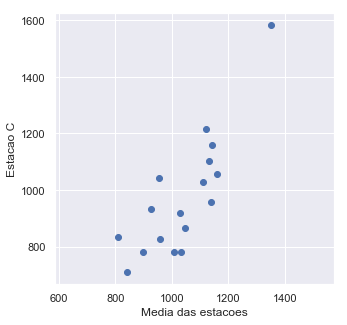

In [7]:
# scatter plot da precipitação anual
plt.figure(figsize=(5,  5))
plt.axis('equal')
plt.scatter(data2.AVG,  data2.C)
plt.xlabel('Media das estacoes')
plt.ylabel('Estacao C');

Este tipo de gráfico tem uma grande dispersão, por isso não é conveniente para detectar anomalias. Não podemos ver tendências nem o ano com possíveis erros no conjunto de dados.
Em vez disso, vamos traçar uma curva de dupla massa. Este gráfico é criado a partir da série de precipitação acumulada. Desta forma, o gráfico deve ter sempre uma tendência positiva e continua, permitindo identificar anomalias nos registros de precipitação.


Esta função `cumsum` do `Pandas` calcula a série acumulada de uma série de dados. Por exemplo:

In [8]:
# série anual de precipitação acumulada
data2.cumsum()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8
1975,6345.0,6744.0,6190.0,5667.0,6589.0,6307.0
1976,7567.0,7762.0,7405.0,6648.0,7763.0,7429.0
1977,8579.0,8513.0,8237.0,7331.0,8534.0,8238.8
1978,9732.0,9572.0,9155.0,8155.0,9722.0,9267.2


Para evitar a duplicação de dados, não salvaremos as séries acumuladas anteriores, mas usaremos a função `cumsum` com muita frequência a seguir.

Vamos traçar a curva de dupla massa para a estação C.

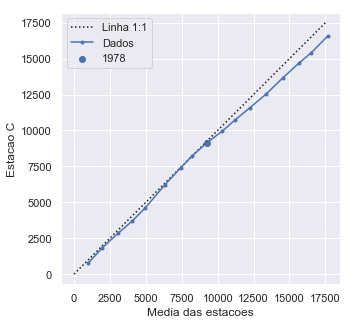

In [9]:
plt.figure(figsize=(5, 5))
# Linha de inclinação 1
plt.plot((0, 17500), (0, 17500), ':k', label='Linha 1:1')
# curva dupla massa
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='Dados')
# ano de 1978
plt.scatter(data2.AVG.cumsum().loc[1978],  data2.C.cumsum().loc[1978], label='1978')

# configuração
plt.axis('equal')
plt.xlabel('Media das estacoes')
plt.ylabel('Estacao C')
plt.legend();

Podemos observar claramente uma quebra na linha no ano de 1978 em diante, correspondendo exatamente ao ano em que a estação C foi movida.

### Corrigindo as séries
Para corrigir a série, devemos decidir se confiamos nos dados antes ou depois da quebra da curva de massa dupla. Para isso, precisaríamos de mais informações sobre a localização e os instrumentos utilizados. Neste exercício, vamos supor que os dados até 1978 são os que mais confiamos, e vamos fixar a série de 1979 em diante.

Os passos são os seguintes::
1. Calcule a inclinação da primeira parte da curva de dupla massa  ($m_1$).
2. Calcule a inclinação da segunda parte da curva de dupla massa  ($m_2$).
3. Corrija a série. Assumindo que a inclinação correta é  $m_1$, a precipitação corrigida  $P_c$ para os dados observados $P_o$ é:
$$P_c = \frac{m_1}{m_2} \cdot P_o$$

Portanto, precisamos aprender como ajustar a inclinação de uma regressão linear da forma $y = m\cdot x$. Vamos primeiro definir uma função que representa essa forma de regressão linear e mais tarde vamos usar a função  `scipy.optimize.curve_fit` para ajustar a inclinação $m$.

In [15]:
# função para a regressão linear
def linear_reg(x, m):
    """ 
    Linear regression with intercept 0: 
    y = m · x
    Input:
    ------
    x: float. Independet value
    m: float. Slope of the linear regression
    Output:
    -------
    y: float. Regressed value
    """
    y = m * x

    return y

In [16]:
# importando a função scipy.optimize.curve_fit
from scipy.optimize import curve_fit

#### Ajuste a regressão para a primeira parte
Esta primeira vez vamos fazê-lo passo a passo.

In [17]:
# definindo x e y para a regressão linear
x = data2.loc[:1978, 'AVG'] 
y = data2.loc[:1978, 'C']

In [18]:
# gerando as series acumuladas
x = x.cumsum() 
y = y.cumsum()

In [19]:
# ajustar a regressão até 1978
m1 = curve_fit(linear_reg, x, y)[0][0] 
print('m1 = {0:.3f}'.format(m1))

m1 = 0.979


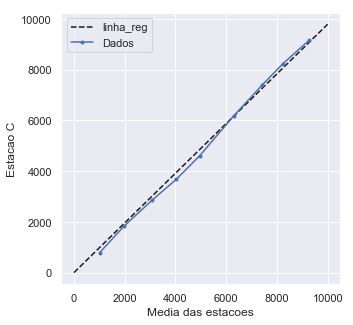

In [20]:
plt.figure(figsize=(5, 5))
# regressão linear
x_ = np.array([0, 10000]) 
y_ = m1 * x_
plt.plot(x_, y_, linestyle='--', color='k', label='linha_reg')

# curva dupla massa
plt.plot(x, y, '.-', label='Dados')

# configuração
plt.axis('equal')
plt.xlabel('Media das estacoes')
plt.ylabel('Estacao C')
plt.legend();

#### Ajuste a regressão para a segunda parte

In [21]:
# ajustar a regressão de 1978 em diante
m2 = curve_fit(linear_reg, data2.loc[1978:, 'AVG'].cumsum(), data2.loc[1978:,
                        'C'].cumsum())[0][0]
print('m1 = {0:.3f}'.format(m2))

m1 = 0.866


#### Corrigindo os dados

In [22]:
# Fator de correção
factor = m1 / m2
print('Fator de correcao = {0:.3f}'.format(factor)) 

Fator de correcao = 1.131


In [23]:
# copie os dados originais em uma nova coluna
data2['C_'] = data2['C']
# multiplique o segundo período pelo fator de correção
data2.loc[1979:, 'C_'] *= factor

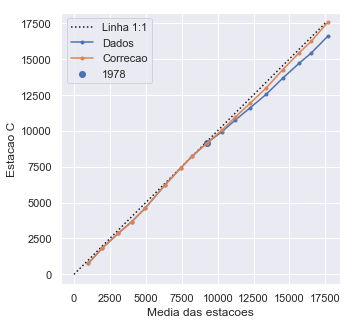

In [24]:
plt.figure(figsize=(5, 5))
# linha de inclinação 1
plt.plot((0, 17500), (0, 17500), ':k', label='Linha 1:1')
# curva dupla massa
plt.plot(data2.AVG.cumsum(), data2.C.cumsum(), '.-', label='Dados') 
plt.plot(data2.AVG.cumsum(), data2.C_.cumsum(), '.-', label='Correcao')

# ano de 1978
plt.scatter(data2.AVG.cumsum().loc[1978],  data2.C.cumsum().loc[1978],
            label='1978')

# configuração
plt.axis('equal')
plt.xlabel('Media das estacoes')
plt.ylabel('Estacao C')
plt.legend();

# save figure
plt.savefig('../Ex2_double-mass curve.png', dpi=300)

### Links úteis:
[USGS report on double-mass curves](https://pubs.usgs.gov/wsp/1541b/report.pdf)<br>
[`SciPy.optimize.curve_fit` help](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)